Fake News Classification 

By Kajol Shah

In [ ]:
#Fake news detection
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [ ]:
#import training data
fake = pd.read_csv("train.csv",header=0,doublequote=True, engine=None)
len(fake)
fake

,id,tid1,tid2,title1_en,title2_en,label
0,195611,0,1,There are two new old-age insurance benefits f...,"Police disprove ""bird's nest congress each per...",unrelated
1,191474,2,3,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP outstrips Hong Kong? Shenzhen S...,unrelated
2,25300,2,4,"""If you do not come to Shenzhen, sooner or lat...",The GDP overtopped Hong Kong? Shenzhen clarifi...,unrelated
3,123757,2,8,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP overtakes Hong Kong? Bureau of ...,unrelated
4,141761,2,11,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP outpaces Hong Kong? Defending R...,unrelated
...,...,...,...,...,...,...
256437,113364,167562,48447,egypt 's presidential election failed to win m...,Salah is retiring? Football Association offici...,unrelated
256438,49407,167562,49795,egypt 's presidential election failed to win m...,Liverpool's bid for Little Germany? The Echo's...,unrelated
256439,130134,167562,114783,egypt 's presidential election failed to win m...,West Media Exposing Tallahlach has been recomm...,unrelated
256440,101494,167562,137705,egypt 's presidential election failed to win m...,Rumor has it that Egypt is very united and the...,unrelated


In [ ]:
fake['title2_en'].iloc[0]


'Police disprove "bird\'s nest congress each person gets 50,000 yuan" still old people insist on going to beijing'

In [ ]:
#import test data
fake_test = pd.read_csv("test.csv",header=0,doublequote=True, engine=None)
len(fake_test)
fake_test

,id,tid1,tid2,title1_en,title2_en
0,256442,100672,100673,"The great coat brother Zhu Zhu Wen, in the man...","Lin xinsheng after the birth of ""hard milking,..."
1,256443,162269,162270,NASA reveals facts about UFO wreckage found on...,"The UFO found in Yuancun, Jiaocheng County, Sh..."
2,256444,157826,157854,The hollow tomatoes are loaded with hormones.,"Li chenfan bingbing home photos, netizen: this..."
3,256445,109579,74076,Ange Pavilion Geoshui: How accurate is Matrimo...,Master one: the eight-character presumption of...
4,256446,15068,15085,A 50-year-old bus-bus blows up an 8-year-old c...,< i > Joe Johnson's disgruntled timing and ord...
...,...,...,...,...,...
64105,320547,94862,94863,The lead content of domestic faucet exceeds th...,"The multi-brand faucet is overtaxed, who is en..."
64106,320548,7451,7452,"In 2018, the household registration system has...","In 2018, the household registration system wil..."
64107,320549,144163,144164,"Onion can not be eaten with this, serious also...","Onion can not eat with this, serious also can ..."
64108,320550,96842,96856,"Grass-root teacher salaries, the last increase...","Teachers wage reform, there will be these thre..."


In [ ]:
# import imblearn
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

Class=2, n=175598 (68.475%)
Class=0, n=74238 (28.949%)
Class=1, n=6606 (2.576%)


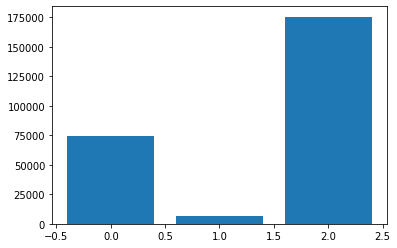

In [ ]:
fake_data = fake.values
# split into input and output elements
X, y = fake_data[:, :-1], fake_data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
fake.isna()

,id,tid1,tid2,title1_en,title2_en,label
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
256437,False,False,False,False,False,False
256438,False,False,False,False,False,False
256439,False,False,False,False,False,False
256440,False,False,False,False,False,False


In [ ]:
fake_test.isna()

,id,tid1,tid2,title1_en,title2_en
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
64105,False,False,False,False,False
64106,False,False,False,False,False
64107,False,False,False,False,False
64108,False,False,False,False,False


In [ ]:
fake.notnull()

,id,tid1,tid2,title1_en,title2_en,label
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
256437,True,True,True,True,True,True
256438,True,True,True,True,True,True
256439,True,True,True,True,True,True
256440,True,True,True,True,True,True


In [ ]:
fake_test.notnull()

,id,tid1,tid2,title1_en,title2_en
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
3,True,True,True,True,True
4,True,True,True,True,True
...,...,...,...,...,...
64105,True,True,True,True,True
64106,True,True,True,True,True
64107,True,True,True,True,True
64108,True,True,True,True,True


In [ ]:
#converting strings to lowercase
#data['msg_lower']= data['clean_msg'].apply(lambda x: x.lower())
fake["title1_en"] = fake["title1_en"].apply(lambda x: x.lower())
fake["title2_en"] = fake["title2_en"].apply(lambda x: x.lower())
print(fake["title1_en"])

0         there are two new old-age insurance benefits f...
1         "if you do not come to shenzhen, sooner or lat...
2         "if you do not come to shenzhen, sooner or lat...
3         "if you do not come to shenzhen, sooner or lat...
4         "if you do not come to shenzhen, sooner or lat...
                                ...                        
256437    egypt 's presidential election failed to win m...
256438    egypt 's presidential election failed to win m...
256439    egypt 's presidential election failed to win m...
256440    egypt 's presidential election failed to win m...
256441    will the united states wage war on iraq withou...
Name: title1_en, Length: 256442, dtype: object


In [ ]:
#converting strings to lowercase for test data set
fake_test["title1_en"] = fake_test["title1_en"].apply(lambda x: x.lower())
fake_test["title2_en"] = fake_test["title2_en"].apply(lambda x: x.lower())
print(fake_test["title1_en"])

0        the great coat brother zhu zhu wen, in the man...
1        nasa reveals facts about ufo wreckage found on...
2            the hollow tomatoes are loaded with hormones.
3        ange pavilion geoshui: how accurate is matrimo...
4        a 50-year-old bus-bus blows up an 8-year-old c...
                               ...                        
64105    the lead content of domestic faucet exceeds th...
64106    in 2018, the household registration system has...
64107    onion can not be eaten with this, serious also...
64108    grass-root teacher salaries, the last increase...
64109    li weijia weeping, crying, drugs? sick? see ho...
Name: title1_en, Length: 64110, dtype: object


In [ ]:
print(fake_test["title2_en"])

0        lin xinsheng after the birth of "hard milking,...
1        the ufo found in yuancun, jiaocheng county, sh...
2        li chenfan bingbing home photos, netizen: this...
3        master one: the eight-character presumption of...
4        < i > joe johnson's disgruntled timing and ord...
                               ...                        
64105    the multi-brand faucet is overtaxed, who is en...
64106    in 2018, the household registration system wil...
64107    onion can not eat with this, serious also can ...
64108    teachers wage reform, there will be these thre...
64109    li weijia on the hot air, netizens: li weijia ...
Name: title2_en, Length: 64110, dtype: object


In [ ]:
#stopwords removal
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
#from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english')) 
print(stop_words)
fake["title1_en"] = fake["title1_en"].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop_words)]))
fake["title2_en"] = fake["title2_en"].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop_words)]))
print(fake[["title1_en", "title2_en"]])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
{'mightn', 'has', "mightn't", 'it', 'here', "should've", 'all', 'ma', 'i', 'then', 'aren', "doesn't", 'each', 'again', 'by', "shan't", 'any', 'y', 'of', 'why', 'shouldn', 'doing', 're', 'between', "isn't", 'most', 'a', 'own', 'be', 'these', 'as', 'are', 'who', 'after', 'hadn', "you're", 's', 'you', 'does', "haven't", 'very', "won't", "you've", "she's", "didn't", 'theirs', 'same', "needn't", 'while', 'll', 'his', "wasn't", 'into', 'didn', 'herself', 'but', 'above', 'can', 'nor', 'won', "don't", 'its', 'what', 'too', 'needn', 'or', 'because', 'couldn', 'hasn', 'with', 'she', 'him', 'on', 'where', 'have', 'from', 'isn', 'than', 'were', 'himself', 'more', 'up', 'some', 'an', 'now', 'this', "aren't", 'your', 'me', "wouldn't", 'yourself', 'whom', 'ourselves', "it's", "you'll", 't', 'those', 'yourselves', 'is', 'over', 'should', 'itself', 'and', 'doesn', 'don', 'for', 'myself', 'when

In [ ]:
#stopwords removal for test dataset
fake_test["title1_en"] = fake_test["title1_en"].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop_words)]))
fake_test["title2_en"] = fake_test["title2_en"].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop_words)]))
print(fake_test[["title1_en", "title2_en"]])

                                               title1_en  \
0      great coat brother zhu zhu wen, mandarin love ...   
1            nasa reveals facts ufo wreckage found moon.   
2                       hollow tomatoes loaded hormones.   
3      ange pavilion geoshui: accurate matrimony matc...   
4      50-year-old bus-bus blows 8-year-old child. ru...   
...                                                  ...   
64105  lead content domestic faucet exceeds standard ...   
64106  2018, household registration system changed, 3...   
64107  onion eaten this, serious also cause eye blind...   
64108  grass-root teacher salaries, last increase end...   
64109  li weijia weeping, crying, drugs? sick? see re...   

                                               title2_en  
0      lin xinsheng birth "hard milking," huo jianhua...  
1      ufo found yuancun, jiaocheng county, shanxi, s...  
2      li chenfan bingbing home photos, netizen: call...  
3      master one: eight-character presumpt

In [ ]:
#punctuation removal
import string
string.punctuation
fake["title1_en"] = fake["title1_en"].apply(lambda x: ''.join([word for word in str(x) if word not in (string.punctuation)]))
fake["title2_en"] = fake["title2_en"].apply(lambda x: ''.join([word for word in str(x) if word not in (string.punctuation)]))
print(fake[["title1_en", "title2_en"]])

                                                title1_en  \
0       two new oldage insurance benefits old people r...   
1       if come shenzhen sooner later son also come le...   
2       if come shenzhen sooner later son also come le...   
3       if come shenzhen sooner later son also come le...   
4       if come shenzhen sooner later son also come le...   
...                                                   ...   
256437  egypt s presidential election failed win milli...   
256438  egypt s presidential election failed win milli...   
256439  egypt s presidential election failed win milli...   
256440  egypt s presidential election failed win milli...   
256441  united states wage war iraq without destructio...   

                                                title2_en  
0       police disprove birds nest congress person get...  
1       shenzhens gdp outstrips hong kong shenzhen sta...  
2       gdp overtopped hong kong shenzhen clarified li...  
3       shenzhens gdp overt

In [ ]:
#punctuation removal for test dataset
fake_test["title1_en"] = fake_test["title1_en"].apply(lambda x: ''.join([word for word in str(x) if word not in (string.punctuation)]))
fake_test["title2_en"] = fake_test["title2_en"].apply(lambda x: ''.join([word for word in str(x) if word not in (string.punctuation)]))
print(fake_test[["title1_en", "title2_en"]])

                                               title1_en  \
0      great coat brother zhu zhu wen mandarin love s...   
1             nasa reveals facts ufo wreckage found moon   
2                        hollow tomatoes loaded hormones   
3      ange pavilion geoshui accurate matrimony match...   
4      50yearold busbus blows 8yearold child rumors r...   
...                                                  ...   
64105  lead content domestic faucet exceeds standard ...   
64106  2018 household registration system changed 3 t...   
64107  onion eaten this serious also cause eye blindn...   
64108  grassroot teacher salaries last increase end y...   
64109   li weijia weeping crying drugs sick see responds   

                                               title2_en  
0      lin xinsheng birth hard milking huo jianhua se...  
1      ufo found yuancun jiaocheng county shanxi shoc...  
2      li chenfan bingbing home photos netizen called...  
3      master one eightcharacter presumptio

In [ ]:
#lemmatization
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

fake["title1_en"] = fake["title1_en"].apply(lambda x: ' '.join([wnl.lemmatize(word) for word in str(x).split()]))
fake["title2_en"] = fake["title2_en"].apply(lambda x: ' '.join([wnl.lemmatize(word) for word in str(x).split()]))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
print(fake[["title1_en", "title2_en"]])

                                                title1_en  \
0       two new oldage insurance benefit old people ru...   
1       if come shenzhen sooner later son also come le...   
2       if come shenzhen sooner later son also come le...   
3       if come shenzhen sooner later son also come le...   
4       if come shenzhen sooner later son also come le...   
...                                                   ...   
256437  egypt s presidential election failed win milli...   
256438  egypt s presidential election failed win milli...   
256439  egypt s presidential election failed win milli...   
256440  egypt s presidential election failed win milli...   
256441  united state wage war iraq without destruction...   

                                                title2_en  
0       police disprove bird nest congress person get ...  
1       shenzhens gdp outstrips hong kong shenzhen sta...  
2       gdp overtopped hong kong shenzhen clarified li...  
3       shenzhens gdp overt

In [ ]:
#applying lemmatization to test data
fake_test["title1_en"] = fake_test["title1_en"].apply(lambda x: ' '.join([wnl.lemmatize(word) for word in str(x).split()]))
fake_test["title2_en"] = fake_test["title2_en"].apply(lambda x: ' '.join([wnl.lemmatize(word) for word in str(x).split()]))


In [ ]:
print(fake_test[["title1_en", "title2_en"]])

                                               title1_en  \
0      great coat brother zhu zhu wen mandarin love s...   
1              nasa reveals fact ufo wreckage found moon   
2                           hollow tomato loaded hormone   
3      ange pavilion geoshui accurate matrimony match...   
4      50yearold busbus blow 8yearold child rumor rum...   
...                                                  ...   
64105  lead content domestic faucet exceeds standard ...   
64106  2018 household registration system changed 3 t...   
64107  onion eaten this serious also cause eye blindn...   
64108  grassroot teacher salary last increase end yea...   
64109       li weijia weeping cry drug sick see responds   

                                               title2_en  
0      lin xinsheng birth hard milking huo jianhua se...  
1      ufo found yuancun jiaocheng county shanxi shoc...  
2      li chenfan bingbing home photo netizen called ...  
3      master one eightcharacter presumptio

In [ ]:
#combining title 1 and title 2
fake["com_title"] = fake["title1_en"] + fake["title2_en"]
print(fake["com_title"])

0         two new oldage insurance benefit old people ru...
1         if come shenzhen sooner later son also come le...
2         if come shenzhen sooner later son also come le...
3         if come shenzhen sooner later son also come le...
4         if come shenzhen sooner later son also come le...
                                ...                        
256437    egypt s presidential election failed win milli...
256438    egypt s presidential election failed win milli...
256439    egypt s presidential election failed win milli...
256440    egypt s presidential election failed win milli...
256441    united state wage war iraq without destruction...
Name: com_title, Length: 256442, dtype: object


In [ ]:
#combining title 1 and title 2 for test dataset
fake_test["com_title"] = fake_test["title1_en"] + fake_test["title2_en"]
print(fake_test["com_title"])

0        great coat brother zhu zhu wen mandarin love s...
1        nasa reveals fact ufo wreckage found moonufo f...
2        hollow tomato loaded hormoneli chenfan bingbin...
3        ange pavilion geoshui accurate matrimony match...
4        50yearold busbus blow 8yearold child rumor rum...
                               ...                        
64105    lead content domestic faucet exceeds standard ...
64106    2018 household registration system changed 3 t...
64107    onion eaten this serious also cause eye blindn...
64108    grassroot teacher salary last increase end yea...
64109    li weijia weeping cry drug sick see respondsli...
Name: com_title, Length: 64110, dtype: object


In [ ]:
print(fake["label"])

0         unrelated
1         unrelated
2         unrelated
3         unrelated
4         unrelated
            ...    
256437    unrelated
256438    unrelated
256439    unrelated
256440    unrelated
256441    unrelated
Name: label, Length: 256442, dtype: object


In [ ]:
one_hot_fake= pd.get_dummies(fake, columns = ['label'])

In [ ]:
one_hot_fake

,id,tid1,tid2,title1_en,title2_en,com_title,label_agreed,label_disagreed,label_unrelated
0,195611,0,1,two new oldage insurance benefit old people ru...,police disprove bird nest congress person get ...,two new oldage insurance benefit old people ru...,0,0,1
1,191474,2,3,if come shenzhen sooner later son also come le...,shenzhens gdp outstrips hong kong shenzhen sta...,if come shenzhen sooner later son also come le...,0,0,1
2,25300,2,4,if come shenzhen sooner later son also come le...,gdp overtopped hong kong shenzhen clarified li...,if come shenzhen sooner later son also come le...,0,0,1
3,123757,2,8,if come shenzhen sooner later son also come le...,shenzhens gdp overtakes hong kong bureau stati...,if come shenzhen sooner later son also come le...,0,0,1
4,141761,2,11,if come shenzhen sooner later son also come le...,shenzhens gdp outpaces hong kong defending rum...,if come shenzhen sooner later son also come le...,0,0,1
...,...,...,...,...,...,...,...,...,...
256437,113364,167562,48447,egypt s presidential election failed win milli...,salah retiring football association official l...,egypt s presidential election failed win milli...,0,0,1
256438,49407,167562,49795,egypt s presidential election failed win milli...,liverpool bid little germany echo disclaimer s...,egypt s presidential election failed win milli...,0,0,1
256439,130134,167562,114783,egypt s presidential election failed win milli...,west medium exposing tallahlach recommended ba...,egypt s presidential election failed win milli...,0,0,1
256440,101494,167562,137705,egypt s presidential election failed win milli...,rumor egypt united difference u,egypt s presidential election failed win milli...,0,0,1


In [ ]:
#splitting dataset into training and validation set
x_train1, x_val1, y_train1, y_val1 = train_test_split(one_hot_fake[["com_title"]], one_hot_fake[["label_agreed", "label_disagreed", "label_unrelated"]], test_size = 0.3, shuffle = True)

In [ ]:
y_train1
#y_train1 = asarray(y_train1)

,label_agreed,label_disagreed,label_unrelated
222939,1,0,0
56615,0,0,1
140977,0,0,1
250715,0,0,1
108030,0,0,1
...,...,...,...
84279,0,1,0
52147,0,0,1
126778,1,0,0
192419,0,0,1


In [ ]:
#Bag of words
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
x_train1.shape

(179509, 1)

In [ ]:
count_vect1 = CountVectorizer()
x_train1_counts = count_vect1.fit_transform(x_train1.iloc[:,0])
x_train1_counts.shape

(179509, 157262)

In [ ]:
x_train1_counts

<179509x157262 sparse matrix of type '<class 'numpy.int64'>'
	with 3015361 stored elements in Compressed Sparse Row format>

In [ ]:
count_vect1.vocabulary_.get(u'algorithm')

7824

In [ ]:
#tf-idf
from sklearn.feature_extraction.text import TfidfTransformer

tfidf1 = TfidfTransformer()
x_train1_tfidf = tfidf1.fit_transform(x_train1_counts)

x_train1_tfidf.shape

(179509, 157262)

In [ ]:
y_train1

,label_agreed,label_disagreed,label_unrelated
222939,1,0,0
56615,0,0,1
140977,0,0,1
250715,0,0,1
108030,0,0,1
...,...,...,...
84279,0,1,0
52147,0,0,1
126778,1,0,0
192419,0,0,1


In [ ]:
y_train1=y_train1.apply(lambda x: x.argmax(), axis=1).values

In [ ]:
y_train1

array([0, 2, 2, ..., 0, 2, 1])

In [ ]:
#label 0 - agreed
#label 1 - disagreed
#label 2 - unrelated

In [ ]:
#Training a naive bayes classifier on training dataset
from sklearn.naive_bayes import MultinomialNB
nb1 = MultinomialNB().fit(x_train1_tfidf, y_train1)
print(x_val1)

                                                com_title
254225  luohuohui full body full body wish marriage bo...
139259  love li yifeng publicly acknowledged love spri...
71199   nigeria refuse repatriate 80000 chinese chinan...
68924   traditional chinese medicine recommends reduci...
5524    latest market price guangxu silver coin yuan d...
...                                                   ...
232546  cell phone exploding aftershock remaining sams...
220374  fourth set rmb 100 yuan whole bundle appreciat...
227698  wangs exgirlfriend sydney love love sweet wang...
163029  child onceinalifetime brain development peak m...
219048  onion bowl caterpillar fungus easy clear blood...

[76933 rows x 1 columns]


In [ ]:
x_val1_counts = count_vect1.transform(x_val1.iloc[:,0])
x_val1_tfidf = tfidf1.transform(x_val1_counts)
pred = nb1.predict(x_val1_tfidf)
print(x_val1_counts.shape)
print(pred)

(76933, 157262)
[2 2 0 ... 2 0 2]


In [ ]:
y_val1 = y_val1.apply(lambda x: x.argmax(), axis=1).values

In [ ]:
#calculate accuracy
from sklearn.metrics import accuracy_score
accu_score1 = accuracy_score(y_val1, pred)
accu_score1

0.731805597077977

In [ ]:
#confusion matrix
from sklearn import metrics

metrics.confusion_matrix(y_val1, pred)

array([[ 4274,     0, 17923],
       [    4,     9,  2029],
       [  677,     0, 52017]])

In [ ]:
print(metrics.classification_report(list(y_val1), list(pred)))

              precision    recall  f1-score   support

           0       0.86      0.19      0.31     22197
           1       1.00      0.00      0.01      2042
           2       0.72      0.99      0.83     52694

    accuracy                           0.73     76933
   macro avg       0.86      0.39      0.39     76933
weighted avg       0.77      0.73      0.66     76933



In [ ]:
from sklearn.model_selection import cross_val_score

accuracy1 = cross_val_score(nb1, x_train1_tfidf, y_train1.ravel(), scoring = 'accuracy', cv = 5)
accuracy1

array([0.72310735, 0.72263384, 0.72057267, 0.7215754 , 0.72465948])

In [ ]:
from sklearn.linear_model import SGDClassifier

#svm = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None).fit(x_train_tfidf, y_train)
svm1 = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None).fit(x_train1_tfidf, y_train1.ravel())

In [ ]:
#predicting using SGD model for dataset 
pred2 = svm1.predict(x_val1_tfidf)
print(pred2)

[2 2 2 ... 2 2 2]


In [ ]:
accu_score2 = accuracy_score(y_val1, pred2)
accu_score2

0.6849336435599808

In [ ]:
#confusion matrix

metrics.confusion_matrix(y_val1, pred2)

array([[    0,     0, 22197],
       [    0,     0,  2042],
       [    0,     0, 52694]])

In [ ]:
print(metrics.classification_report(list(y_val1), list(pred2)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     22197
           1       0.00      0.00      0.00      2042
           2       0.68      1.00      0.81     52694

    accuracy                           0.68     76933
   macro avg       0.23      0.33      0.27     76933
weighted avg       0.47      0.68      0.56     76933



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import cross_val_score
#accuracy2 = cross_val_score(svm, x_val_tfidf, y_val.ravel(), scoring = 'accuracy', cv = 5)
accuracy2 = cross_val_score(svm1, x_train1_tfidf, y_train1.ravel(), scoring = 'accuracy', cv = 5)
accuracy2

array([0.68464152, 0.68466938, 0.68466938, 0.68466938, 0.68468845])

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
#lr = LogisticRegression(verbose=1, solver = 'liblinear', random_state=0, C=5, penalty='l2',max_iter=1000).fit(x_train_tfidf, y_train)
lr1 = LogisticRegression(verbose=1, solver = 'liblinear', random_state=0, C=5, penalty='l2',max_iter=1000).fit(x_train1_tfidf, y_train1.ravel())
#predicting using SVM model for dataset 
pred3 = lr1.predict(x_val1_tfidf)
print(pred3)

[LibLinear][2 0 0 ... 0 0 2]


In [ ]:
accu_score3 = accuracy_score(y_val1, pred3)
accu_score3

0.8091066252453434

In [ ]:
metrics.confusion_matrix(y_val1, pred3)

array([[13870,    22,  8305],
       [   80,   422,  1540],
       [ 4612,   127, 47955]])

In [ ]:
print(metrics.classification_report(list(y_val1), list(pred3)))

              precision    recall  f1-score   support

           0       0.75      0.62      0.68     22197
           1       0.74      0.21      0.32      2042
           2       0.83      0.91      0.87     52694

    accuracy                           0.81     76933
   macro avg       0.77      0.58      0.62     76933
weighted avg       0.80      0.81      0.80     76933



In [ ]:
from sklearn.model_selection import cross_val_score
accuracy3 = cross_val_score(lr1, x_train1_tfidf, y_train1.ravel(), scoring = 'accuracy', cv = 5)
accuracy3

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

array([0.80469055, 0.80182163, 0.80313074, 0.80151524, 0.80231748])

In [ ]:
#Ramdom Forest
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(max_depth = 2, random_state = 0).fit(x_train1_tfidf, y_train1.ravel())
pred4 = rf1.predict(x_val1_tfidf)
print(pred4)

[2 2 2 ... 2 2 2]


In [ ]:
metrics.confusion_matrix(y_val1, pred4)

array([[    0,     0, 22197],
       [    0,     0,  2042],
       [    0,     0, 52694]])

In [ ]:
accu_score4 = accuracy_score(y_val1, pred4)
accu_score4

0.6849336435599808

In [ ]:
print(metrics.classification_report(list(y_val1), list(pred4)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     22197
           1       0.00      0.00      0.00      2042
           2       0.68      1.00      0.81     52694

    accuracy                           0.68     76933
   macro avg       0.23      0.33      0.27     76933
weighted avg       0.47      0.68      0.56     76933



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
accuracy4 = cross_val_score(rf1, x_train1_tfidf, y_train1.ravel(), scoring = 'accuracy', cv = 5)
accuracy4

array([0.68464152, 0.68466938, 0.68466938, 0.68466938, 0.68468845])

In [ ]:
#Support Vector Classifier
from sklearn.svm import LinearSVC
svc1 = LinearSVC(random_state = 0).fit(x_train1_tfidf, y_train1.ravel())
pred5 = svc1.predict(x_val1_tfidf)
print(pred5)

[2 2 0 ... 0 0 2]


In [ ]:
accu_score5 = accuracy_score(y_val1, pred5)
accu_score5

0.8163206946303927

In [ ]:
accuracy5 = cross_val_score(svc1, x_train1_tfidf, y_train1.ravel(), scoring = 'accuracy', cv = 5)
accuracy5

array([0.80970419, 0.80881288, 0.80959278, 0.80619464, 0.80869614])

In [ ]:
metrics.confusion_matrix(y_val1, pred5)

array([[14521,    26,  7650],
       [   80,   538,  1424],
       [ 4783,   168, 47743]])

In [ ]:
print(metrics.classification_report(list(y_val1), list(pred5)))

              precision    recall  f1-score   support

           0       0.75      0.65      0.70     22197
           1       0.73      0.26      0.39      2042
           2       0.84      0.91      0.87     52694

    accuracy                           0.82     76933
   macro avg       0.77      0.61      0.65     76933
weighted avg       0.81      0.82      0.81     76933



In [ ]:
count_vect2 = CountVectorizer()
x_train2_counts = count_vect2.fit_transform(one_hot_fake[["com_title"]].iloc[:,0])
x_train2_counts.shape

(256442, 197530)

In [ ]:
x_train2_counts

<256442x197530 sparse matrix of type '<class 'numpy.int64'>'
	with 4304323 stored elements in Compressed Sparse Row format>

In [ ]:
count_vect2.vocabulary_.get(u'algorithm')


9713

In [ ]:

y_train2 = one_hot_fake[["label_agreed", "label_disagreed", "label_unrelated"]].apply(lambda x: x.argmax(), axis=1).values

In [ ]:
y_train2

array([2, 2, 2, ..., 2, 2, 2])

Class=2, n=175598 (33.333%)
Class=0, n=175598 (33.333%)
Class=1, n=175598 (33.333%)


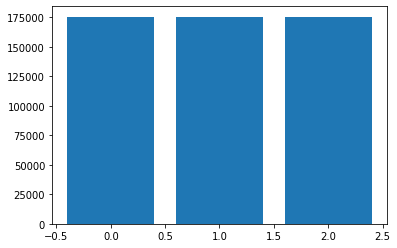

In [ ]:
#data augmentation - oversampling
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
#x_train = pd.DataFrame(x_train)
#X_resampled, y_resampled = oversample.fit_resample(x_train_counts, y_train)
X_resampled, y_resampled = oversample.fit_resample(x_train2_counts, y_train2)
#X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y_resampled)
for k,v in counter.items():
	per = v / len(y_resampled) * 100
#	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
count_vect2.vocabulary_.get(u'algorithm')


9713

In [ ]:
x_train2 = X_resampled
y_train2 = y_resampled


In [ ]:
#splitting dataset into training and validation set
x_train2, x_val2, y_train2, y_val2 = train_test_split(x_train2, y_train2, test_size = 0.3, shuffle = True)

In [ ]:
#tf-idf
from sklearn.feature_extraction.text import TfidfTransformer

tfidf2 = TfidfTransformer()
x_train2_tfidf = tfidf2.fit_transform(x_train2)

x_train2_tfidf.shape

(368755, 197530)

In [ ]:
#Training a naive bayes classifier on training dataset
from sklearn.naive_bayes import MultinomialNB

nb2 = MultinomialNB().fit(x_train2_tfidf, y_train2.ravel())


In [ ]:
#x_val_counts = count_vect.transform(x_val.iloc[:,0])
x_val2_tfidf = tfidf2.transform(x_val2)
dpred = nb2.predict(x_val2_tfidf)
print(x_val2.shape)
print(dpred)

(158039, 197530)
[2 0 2 ... 2 0 1]


In [ ]:
#calculate accuracy
from sklearn.metrics import accuracy_score
daccu_score1 = accuracy_score(y_val2, dpred)
daccu_score1

0.7802884098228918

In [ ]:
#confusion matrix
from sklearn import metrics

metrics.confusion_matrix(y_val2, dpred)

array([[42792,  2863,  7275],
       [ 2178, 46202,  4154],
       [14878,  3375, 34322]])

In [ ]:
print(metrics.classification_report(list(y_val2), list(dpred)))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76     52930
           1       0.88      0.88      0.88     52534
           2       0.75      0.65      0.70     52575

    accuracy                           0.78    158039
   macro avg       0.78      0.78      0.78    158039
weighted avg       0.78      0.78      0.78    158039



In [ ]:
dpred

array([2, 0, 2, ..., 2, 0, 1])

In [ ]:
from sklearn.model_selection import cross_val_score

daccuracy1 = cross_val_score(nb2, x_train2_tfidf, y_train2.ravel(), scoring = 'accuracy', cv = 5)
daccuracy1

array([0.77928435, 0.77861995, 0.7781047 , 0.77756234, 0.77866063])

In [ ]:
#accu1 = np.mean(pred == y_val)

#print("accuracy is ", accu1)

In [ ]:
from sklearn.linear_model import SGDClassifier

#svm = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None).fit(x_train_tfidf, y_train)
svm2 = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None).fit(x_train2_tfidf, y_train2.ravel())

In [ ]:
#predicting using SVM model for dataset 
dpred2 = svm2.predict(x_val2_tfidf)
print(dpred2)

[2 0 1 ... 1 0 1]


In [ ]:
daccu_score2 = accuracy_score(y_val2, dpred2)
daccu_score2

0.6372034750915914

In [ ]:
#confusion matrix

metrics.confusion_matrix(y_val2, dpred2)

array([[40895,  8287,  3748],
       [ 2246, 49210,  1078],
       [23369, 18608, 10598]])

In [ ]:
print(metrics.classification_report(list(y_val2), list(dpred2)))

              precision    recall  f1-score   support

           0       0.61      0.77      0.68     52930
           1       0.65      0.94      0.77     52534
           2       0.69      0.20      0.31     52575

    accuracy                           0.64    158039
   macro avg       0.65      0.64      0.59    158039
weighted avg       0.65      0.64      0.59    158039



In [ ]:
from sklearn.model_selection import cross_val_score
#accuracy2 = cross_val_score(svm, x_val_tfidf, y_val.ravel(), scoring = 'accuracy', cv = 5)
accuracy2 = cross_val_score(svm2, x_train2_tfidf, y_train2.ravel(), scoring = 'accuracy', cv = 5)
accuracy2

array([0.63951675, 0.63862185, 0.63901506, 0.63740153, 0.63944896])

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
#lr = LogisticRegression(verbose=1, solver = 'liblinear', random_state=0, C=5, penalty='l2',max_iter=1000).fit(x_train_tfidf, y_train)
lr2 = LogisticRegression(verbose=1, solver = 'liblinear', random_state=0, C=5, penalty='l2',max_iter=1000).fit(x_train2_tfidf, y_train2.ravel())
#predicting using SVM model for dataset 
dpred3 = lr2.predict(x_val2_tfidf)
print(dpred3)

[LibLinear][2 0 2 ... 2 0 1]


In [ ]:
daccu_score3 = accuracy_score(y_val2, dpred3)
daccu_score3

0.8584906257316232

In [ ]:
metrics.confusion_matrix(y_val2, dpred3)

array([[44382,  2438,  6110],
       [  813, 50924,   797],
       [ 9680,  2526, 40369]])

In [ ]:
print(metrics.classification_report(list(y_val2), list(dpred3)))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82     52930
           1       0.91      0.97      0.94     52534
           2       0.85      0.77      0.81     52575

    accuracy                           0.86    158039
   macro avg       0.86      0.86      0.86    158039
weighted avg       0.86      0.86      0.86    158039



In [ ]:
from sklearn.model_selection import cross_val_score
daccuracy3 = cross_val_score(lr2, x_train2_tfidf, y_train2.ravel(), scoring = 'accuracy', cv = 5)
daccuracy3

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

array([0.85434774, 0.85400876, 0.85357487, 0.8548901 , 0.85433418])

In [ ]:
#Ramdom Forest
from sklearn.ensemble import RandomForestClassifier
rf2 = RandomForestClassifier(max_depth = 2, random_state = 0).fit(x_train2_tfidf, y_train2.ravel())
dpred4 = rf2.predict(x_val2_tfidf)
print(dpred4)

[2 2 2 ... 2 1 1]


In [ ]:
metrics.confusion_matrix(y_val2, dpred4)

array([[ 9422, 20299, 23209],
       [  715, 44660,  7159],
       [ 5182, 16012, 31381]])

In [ ]:
daccu_score4 = accuracy_score(y_val2, dpred4)
daccu_score4

0.5407715816981884

In [ ]:
print(metrics.classification_report(list(y_val2), list(dpred4)))

              precision    recall  f1-score   support

           0       0.62      0.18      0.28     52930
           1       0.55      0.85      0.67     52534
           2       0.51      0.60      0.55     52575

    accuracy                           0.54    158039
   macro avg       0.56      0.54      0.50    158039
weighted avg       0.56      0.54      0.50    158039



In [ ]:
daccuracy4 = cross_val_score(rf2, x_train2_tfidf, y_train2.ravel(), scoring = 'accuracy', cv = 5)
daccuracy4

array([0.53254871, 0.54237909, 0.54015539, 0.52496915, 0.55220946])

In [ ]:
#Support Vector Classifier
from sklearn.svm import LinearSVC
svc2 = LinearSVC(random_state = 0).fit(x_train2_tfidf, y_train2)
dpred5 = svc2.predict(x_val2_tfidf)
print(dpred5)

[2 0 2 ... 2 0 1]


In [ ]:
daccu_score5 = accuracy_score(y_val2, dpred5)
daccu_score5

0.8656913799758288

In [ ]:
daccuracy5 = cross_val_score(svc2, x_train2_tfidf, y_train2.ravel(), scoring = 'accuracy', cv = 5)
daccuracy5

array([0.86122222, 0.86105951, 0.86112731, 0.86255102, 0.86122222])

In [ ]:
metrics.confusion_matrix(y_val2, dpred5)

array([[45029,  2490,  5411],
       [  639, 51247,   648],
       [ 9666,  2372, 40537]])

In [ ]:
print(metrics.classification_report(list(y_val2), list(dpred5)))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83     52930
           1       0.91      0.98      0.94     52534
           2       0.87      0.77      0.82     52575

    accuracy                           0.87    158039
   macro avg       0.87      0.87      0.86    158039
weighted avg       0.87      0.87      0.86    158039



In [ ]:
x_test = fake_test["com_title"]
x_test

0        great coat brother zhu zhu wen mandarin love s...
1        nasa reveals fact ufo wreckage found moonufo f...
2        hollow tomato loaded hormoneli chenfan bingbin...
3        ange pavilion geoshui accurate matrimony match...
4        50yearold busbus blow 8yearold child rumor rum...
                               ...                        
64105    lead content domestic faucet exceeds standard ...
64106    2018 household registration system changed 3 t...
64107    onion eaten this serious also cause eye blindn...
64108    grassroot teacher salary last increase end yea...
64109    li weijia weeping cry drug sick see respondsli...
Name: com_title, Length: 64110, dtype: object

In [ ]:
x_test_counts = count_vect2.transform(fake_test[["com_title"]].iloc[:,0])
x_test_tfidf = tfidf2.transform(x_test_counts)
tpred = svc2.predict(x_test_tfidf)
print(x_test_counts.shape)
print(tpred)

(64110, 197530)
[2 0 2 ... 0 2 0]


In [ ]:
type(tpred)


numpy.ndarray

In [ ]:
len(tpred)

64110

In [ ]:
#write to output file
tpred2 = [None] * 64110
for i in range(len(tpred)):
  if tpred[i] == 0:
    tpred2[i] = 'agreed'
  elif tpred[i] == 1:
    tpred2[i] = 'disagreed'
  else:
    tpred2[i] = 'unrelated'
tpred2

['unrelated',
 'agreed',
 'unrelated',
 'unrelated',
 'unrelated',
 'unrelated',
 'unrelated',
 'unrelated',
 'agreed',
 'unrelated',
 'agreed',
 'agreed',
 'unrelated',
 'unrelated',
 'unrelated',
 'unrelated',
 'agreed',
 'unrelated',
 'unrelated',
 'agreed',
 'unrelated',
 'unrelated',
 'unrelated',
 'unrelated',
 'unrelated',
 'agreed',
 'unrelated',
 'unrelated',
 'agreed',
 'unrelated',
 'unrelated',
 'agreed',
 'agreed',
 'unrelated',
 'agreed',
 'agreed',
 'unrelated',
 'unrelated',
 'unrelated',
 'agreed',
 'unrelated',
 'unrelated',
 'agreed',
 'unrelated',
 'agreed',
 'unrelated',
 'unrelated',
 'unrelated',
 'agreed',
 'agreed',
 'agreed',
 'unrelated',
 'agreed',
 'agreed',
 'unrelated',
 'unrelated',
 'unrelated',
 'agreed',
 'disagreed',
 'unrelated',
 'unrelated',
 'unrelated',
 'agreed',
 'agreed',
 'unrelated',
 'unrelated',
 'unrelated',
 'agreed',
 'unrelated',
 'unrelated',
 'unrelated',
 'agreed',
 'unrelated',
 'unrelated',
 'agreed',
 'unrelated',
 'unrelated',


In [ ]:
tpred2[0]

'unrelated'

In [ ]:
tpred[1]

0

In [ ]:
import csv
list_1 = fake_test['id'].tolist()
list_1.insert(0, 'id')
list_2 = tpred2
list_2.insert(0, 'label')
with open('submission.csv', 'w') as f:
  writer = csv.writer(f, delimiter='\t')
  writer.writerows(zip(list_1,list_2))

In [ ]:
tpred2[0]

'label'

In [ ]:
#Importing LSTM libraries
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, load_model
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

#Docs

#LSTM Model 1
# The maximum number of words to be used for vocabulary
MAX_NB_WORDS = 50000
# Max number of words in each title.
MAX_SEQUENCE_LENGTH = 250
# Fixed word embeding layer dimension
EMBEDDING_DIM = 100

#Set up our Tokenizer for Keras
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)

#Update our internal vocabulary for tokenizer based on 'com_titles'
tokenizer.fit_on_texts(fake['com_title'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 197803 unique tokens.


In [ ]:
#Truncate and pad our input sentences to max sentence value so that they are in the same length
X = tokenizer.texts_to_sequences(fake['com_title'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH,padding='post')
print('Shape of data tensor:', X.shape)

Shape of data tensor: (256442, 250)


In [ ]:
#Convert categorical label into number
Y = pd.get_dummies(fake['label']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (256442, 3)


In [ ]:
#Split our training to train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 30)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(230797, 250) (230797, 3)
(25645, 250) (25645, 3)


In [ ]:
#LSTM with 100 length vectors for word embedding, with LSTM of 100 memory units, and softmax for activation function
#With categorical_crossentropy as the loss function
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

In [ ]:
#If using google colab
# !unzip '/content/LSTM_Classification_Model.zip' 
# model = load_model('/content/index_model')

#If model is in local file system
model = load_model('index_model')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 100)          5000000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 250, 100)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 3)                 303       
Total params: 5,080,703
Trainable params: 5,080,703
Non-trainable params: 0
_________________________________________________________________


In [ ]:
pred=model.predict(X_test)

In [ ]:
Y_test

array([[0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1]], dtype=uint8)

In [ ]:
print(metrics.classification_report(np.argmax(Y_test, axis=1), np.argmax(pred, axis=1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7418
           1       0.00      0.00      0.00       666
           2       0.68      1.00      0.81     17561

    accuracy                           0.68     25645
   macro avg       0.23      0.33      0.27     25645
weighted avg       0.47      0.68      0.56     25645



C:\Users\caoti\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\caoti\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\caoti\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Save model for later prediction
# model.save("/content/index_model") 

# #Zip saved folder and download it to local pc as 1 file
# !zip -r /content/file.zip /content/index_model
# from google.colab import files
# files.download("/content/file.zip")

In [ ]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.plot(model.history['loss'], label='train')
plt.plot(model.history['val_loss'], label='test')
plt.legend()
plt.show();

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [ ]:
#LSTM updated with 100 length vectors for word embedding, with 3 LSTM of 32,64,128 memory units, and softmax for activation function
#With categorical_crossentropy as the loss function
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(32, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
model.add(LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 1
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

In [ ]:
#Only run if using google colab
# !unzip '/content/newLSTM_updated.zip' 
#If model is in local file system
model = load_model('newLSTM_updated')

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 250, 100)          5000000   
_________________________________________________________________
spatial_dropout1d_9 (Spatial (None, 250, 100)          0         
_________________________________________________________________
lstm_22 (LSTM)               (None, 250, 32)           17024     
_________________________________________________________________
lstm_23 (LSTM)               (None, 250, 64)           24832     
_________________________________________________________________
lstm_24 (LSTM)               (None, 128)               98816     
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 387       
Total params: 5,141,059
Trainable params: 5,141,059
Non-trainable params: 0
___________________________________________

In [ ]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.plot(model.history['loss'], label='train')
plt.plot(model.history['val_loss'], label='test')
plt.legend()
plt.show();

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [ ]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

802/802 [==============================] - 325s 390ms/step - loss: 0.7137 - accuracy: 0.6848
Test set
  Loss: 0.714
  Accuracy: 0.685


In [ ]:
pred=model.predict(X_test)

In [ ]:
print(metrics.classification_report(np.argmax(Y_test, axis=1), np.argmax(pred, axis=1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7418
           1       0.00      0.00      0.00       666
           2       0.68      1.00      0.81     17561

    accuracy                           0.68     25645
   macro avg       0.23      0.33      0.27     25645
weighted avg       0.47      0.68      0.56     25645



C:\Users\caoti\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\caoti\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\caoti\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Start to predict model (Testing)
predict_set = [['The great coat brother Zhu Zhu Wen, in the mandarin love song to sing the song is really the lanca- talent is very sweet! Lin xinsheng after the birth of "hard milking," Huo jianhua is not seen, "forced marriage" is real?'],["How to discriminate oil from gutter oil by means of garlic. It's very practical to use a single piece of garlic to distinguish oil from oil! "]]
seq = tokenizer.texts_to_sequences(predict_set)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['unrelated','agreed','disagreed']
print(pred, labels[np.argmax(pred)])
classes = np.argmax(pred, axis =1 )
answer=[labels[x] for x in classes]
print(answer)

[[0.30675995 0.02732092 0.66591907]
 [0.30675995 0.02732092 0.66591907]] disagreed
['disagreed', 'disagreed']
